In [1]:
#@author - Tejasvi Sharma
from os import listdir
import nltk.data
from os.path import isfile, join
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
import re

sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()

In [2]:
path_to_homework_5_data_directory = "../data"
def read_file(filename):
    input_file_text = open(filename , encoding='utf-8').read()
    return input_file_text

def read_text_and_tokenize(text_data):
    pattern = re.compile("[A-Za-z./-]*")
    punkt_sentences = sentence_tokenizer.tokenize(text_data)
    sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
    sentences_words_new=[]
    for sentence in sentences_words:
        for word in sentence:
            if(word not in stop_words):
                if(pattern.fullmatch(word)):
                    sentences_words_new.append(lemmatizer.lemmatize(str.lower(word).replace(".", "")))
    return sentences_words_new

article_hash = {} # this hash should serve to represent the content of the files in the data directory
# use the filename as the hash key and the value will be the text of the file
# thus you would be able to retrieve an individual documents text like: article_hash["article_1"]

# here we will get a list of the filenames of things contained in the data directory
files = [f for f in listdir(path_to_homework_5_data_directory) if isfile(join(path_to_homework_5_data_directory, f))]

# here you will iterate over all the files contained in the directory
for f in files: # implement the rest of this line and the content of the loop
    # you will read the content of the file and put the text into the hash
    article_hash[f] = read_file(join(path_to_homework_5_data_directory, f))



In [3]:
# setup a new hash to store the results in
processed_article_hash = {}

# iterate through the keys, i.e. document ids, in the hash to pull out the stored text and process
for key in article_hash.keys():
    text_of_article = article_hash[key]
    
    # here you can apply your segmentation, tokenization, and stemming steps as you see fit
    
    processed_article_hash[key] =read_text_and_tokenize(article_hash[key])

In [4]:
def jacardian_distance(document_1_data, document_2_data):
    t = list(set(document_1_data) & set(document_2_data))
    words_in_doc_1_not_in_doc_2 = len(set(document_1_data))-len(t)
    words_in_doc_2_not_in_doc_1 = len(set(document_2_data))-len(t)
    words_in_both_doc_1_and_doc_2 = len(t)
    
    jacardian = words_in_both_doc_1_and_doc_2/(words_in_doc_1_not_in_doc_2+words_in_doc_2_not_in_doc_1+words_in_both_doc_1_and_doc_2)
    
    return jacardian
    
def cosine_similarity(document_1_data, document_2_data):
    set(set(document_1_data) & set(document_2_data))
    document_vector_word_index = list(set(set(document_1_data) | set(document_2_data))) # here fill this with an ordered list of all the unique words across both documents
    document_1_vector = [document_1_data.count(i) for i in document_vector_word_index]# fill in the array with the frequency of the words in the document
    document_2_vector = [document_2_data.count(i) for i in document_vector_word_index] # fill in the array with the frequency of the words in the document
    
    return np.dot(document_1_vector,document_2_vector)/(distance.euclidean(document_1_vector,np.zeros(len(document_1_vector)))*distance.euclidean(document_2_vector,np.zeros(len(document_2_vector))))

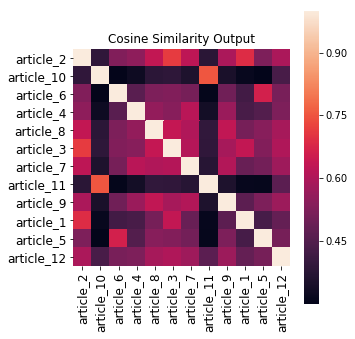

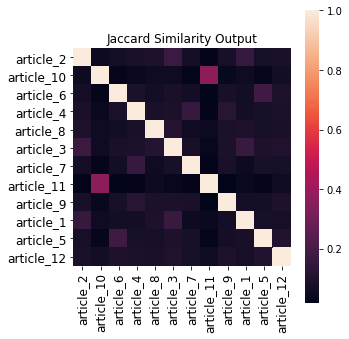

In [5]:
# create a variable to store your table data... you could use a hash or some other data structure. 
# We just want it to identify which document is being compared to which other document.

data_structure_for_jacard_similarity =[[0 for x in range(len(list(article_hash.keys())))] for y in range(len(list(article_hash.keys())))] 
data_structure_for_cosine_similarity =[[0 for x in range(len(list(article_hash.keys())))] for y in range(len(list(article_hash.keys())))] 
i=0
article_hash_keys_list=list(article_hash.keys())
for doc_1_key in article_hash_keys_list:
    j=0
    for doc_2_key in article_hash_keys_list:
        # we have the nested for loops as one way to compare each document to each other document
        data_structure_for_jacard_similarity[i][j] = jacardian_distance(processed_article_hash[doc_1_key],processed_article_hash[doc_2_key])
        data_structure_for_cosine_similarity[i][j] = cosine_similarity(processed_article_hash[doc_1_key],processed_article_hash[doc_2_key])
        j=j+1
    i=i+1
# finally, find some way to present this data back. Either as a straight table or a heatmap.
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_structure_for_cosine_similarity, square=True, ax=ax,xticklabels=article_hash_keys_list,yticklabels=article_hash_keys_list)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(fontsize=12)
plt.title("Cosine Similarity Output")
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_structure_for_jacard_similarity, square=True, ax=ax,xticklabels=article_hash_keys_list,yticklabels=article_hash_keys_list)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(fontsize=12)
plt.title("Jaccard Similarity Output")
plt.tight_layout()
plt.show()

<-- put your comments here -->



Step 5: You should now have two different similarity mechanisms. What do your results suggest? From perusing the documents, do you think the suggested ones are similar or not? Does tokenization, stemming, stop word removal or anything else improve your results?

Write a brief description of your reactions to identifying these similar documents and what measures and pre-processing steps you think worked best.


Results suggets that cosine similarity works better than jaccard similarity. Yes the suggested document from output are similar. Similarity value increased when stop words were removed and remaining words were lemmatized. We can also remove the puntuation and implmenting different stemming and lemmatizing techniques.

For this particular problem tokenizing, lemmitization, stop words removal and removing random numbers worked. Moreover I converted every word to lowercase which resulted in increasing similarity value.